# Settings

In [ ]:
#@title imports
import json, sys

import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [ ]:
#@title parameters

TRAINING_SIZE = 20_000

# tokenizer
VOCAB_SIZE = 10_000
MAX_LENGTH = 32
TRUNC_TYPE ='post'
PADDING_TYPE = 'post'
OOV_TOKEN = "<OOV>"

# model
EMBEDDING_DIM = 16

# training
EPOCHS = 10

In [ ]:
#@title downloads
%%capture
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

# original dataset https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection

In [ ]:
#@title functions
def plot_loss_acc(history):
  train_acc = history.history[     'accuracy' ]
  val_acc = history.history[ 'val_accuracy' ]
  train_loss = history.history[    'loss' ]
  val_loss = history.history['val_loss' ]
  epochs   = range(len(train_acc))

  plt.rcParams['figure.figsize'] = [5, 2]

  # plot training and validation accuracy per epoch
  plt.subplot(1, 3, 1)
  plt.plot  ( epochs,     train_acc )
  plt.plot  ( epochs, val_acc )
  plt.title ( 'Accuracy' )

  # plot training and validation loss per epoch
  plt.subplot(1, 3, 2)
  plt.plot  ( epochs,     train_loss )
  plt.plot  ( epochs, val_loss )
  plt.title ( 'Loss' )

  # subplot for legend
  plt.subplot(1, 3, 3)
  plt.plot([], [], label='Plot 1')
  plt.plot([], [], label='Plot 2')
  plt.legend(loc='upper left')
  plt.axis('off')

  plt.tight_layout(rect=[0, 0, 2, 1])
  plt.legend(['training', 'validation'], loc='upper left')
  plt.show();

# Dataset

In [ ]:
with open("./sarcasm.json", 'r') as f:
    data = json.load(f)

# Non-sarcastic headline
print(data[0])
# Sarcastic headline
print(data[20000])
print('Number of records:', len(data))

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5', 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers", 'is_sarcastic': 0}
{'article_link': 'https://www.theonion.com/pediatricians-announce-2011-newborns-are-ugliest-babies-1819572977', 'headline': 'pediatricians announce 2011 newborns are ugliest babies in 30 years', 'is_sarcastic': 1}
Number of records: 26709


In [ ]:
# prepare training and testing data
sentences = []
labels = []
urls = []

for item in data:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

training_sentences = sentences[0:TRAINING_SIZE]
training_labels = labels[0:TRAINING_SIZE]

testing_sentences = sentences[TRAINING_SIZE:]
testing_labels = labels[TRAINING_SIZE:]

# Preprocessing

In [ ]:
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)

# Generate word index dict (tokenize the corpus)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=MAX_LENGTH, padding=PADDING_TYPE, truncating=TRUNC_TYPE)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=MAX_LENGTH, padding=PADDING_TYPE, truncating=TRUNC_TYPE)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

# Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 16, 16)            16000     
                                                                 
 global_average_pooling1d_3   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_6 (Dense)             (None, 24)                408       
                                                                 
 dense_7 (Dense)             (None, 1)                 25        
                                                                 
Total params: 16,433
Trainable params: 16,433
Non-trainable params: 0
_________________________________________________________________


# Training

In [ ]:
sys.exit("Execution stopped. Please run cells selectively.")

In [ ]:
history = model.fit(training_padded, training_labels, epochs=EPOCHS, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
625/625 - 3s - loss: 0.5736 - accuracy: 0.6933 - val_loss: 0.4127 - val_accuracy: 0.8346 - 3s/epoch - 5ms/step
Epoch 2/10
625/625 - 2s - loss: 0.3238 - accuracy: 0.8733 - val_loss: 0.3544 - val_accuracy: 0.8463 - 2s/epoch - 4ms/step
Epoch 3/10
625/625 - 2s - loss: 0.2426 - accuracy: 0.9064 - val_loss: 0.3499 - val_accuracy: 0.8469 - 2s/epoch - 4ms/step
Epoch 4/10
625/625 - 2s - loss: 0.1959 - accuracy: 0.9255 - val_loss: 0.3580 - val_accuracy: 0.8545 - 2s/epoch - 3ms/step
Epoch 5/10
625/625 - 2s - loss: 0.1632 - accuracy: 0.9390 - val_loss: 0.3858 - val_accuracy: 0.8483 - 2s/epoch - 3ms/step
Epoch 6/10
625/625 - 2s - loss: 0.1378 - accuracy: 0.9498 - val_loss: 0.4126 - val_accuracy: 0.8474 - 2s/epoch - 3ms/step
Epoch 7/10
625/625 - 2s - loss: 0.1175 - accuracy: 0.9596 - val_loss: 0.4481 - val_accuracy: 0.8453 - 2s/epoch - 3ms/step
Epoch 8/10
625/625 - 2s - loss: 0.1021 - accuracy: 0.9669 - val_loss: 0.4947 - val_accuracy: 0.8407 - 2s/epoch - 4ms/step
Epoch 9/10
625/625 - 2s 

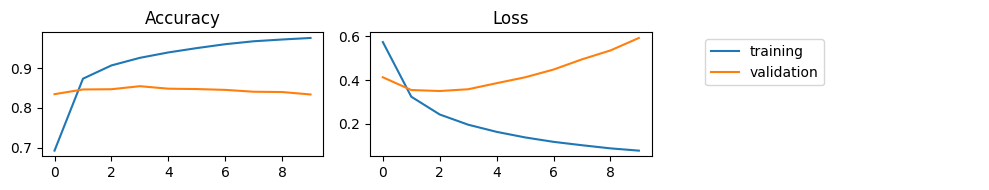

In [ ]:
plot_loss_acc(history)

In [ ]:
sys.exit("Execution stopped. Please run cells selectively.")

Let's tweak some parameters to avoid overfitting



In [ ]:
VOCAB_SIZE = 1000 # instead of 10_000
MAX_LENGTH = 16   # instead of 32

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=MAX_LENGTH, padding=PADDING_TYPE, truncating=TRUNC_TYPE)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=MAX_LENGTH, padding=PADDING_TYPE, truncating=TRUNC_TYPE)
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()

history = model.fit(training_padded, training_labels, epochs=EPOCHS, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
625/625 - 2s - loss: 0.5299 - accuracy: 0.7268 - val_loss: 0.4137 - val_accuracy: 0.8104 - 2s/epoch - 3ms/step
Epoch 2/10
625/625 - 2s - loss: 0.3810 - accuracy: 0.8275 - val_loss: 0.4002 - val_accuracy: 0.8128 - 2s/epoch - 3ms/step
Epoch 3/10
625/625 - 2s - loss: 0.3638 - accuracy: 0.8354 - val_loss: 0.4005 - val_accuracy: 0.8152 - 2s/epoch - 3ms/step
Epoch 4/10
625/625 - 1s - loss: 0.3585 - accuracy: 0.8361 - val_loss: 0.4033 - val_accuracy: 0.8140 - 1s/epoch - 2ms/step
Epoch 5/10
625/625 - 1s - loss: 0.3569 - accuracy: 0.8382 - val_loss: 0.4036 - val_accuracy: 0.8140 - 1s/epoch - 2ms/step
Epoch 6/10
625/625 - 1s - loss: 0.3543 - accuracy: 0.8382 - val_loss: 0.4057 - val_accuracy: 0.8140 - 1s/epoch - 2ms/step
Epoch 7/10
625/625 - 1s - loss: 0.3538 - accuracy: 0.8407 - val_loss: 0.4088 - val_accuracy: 0.8126 - 1s/epoch - 2ms/step
Epoch 8/10
625/625 - 1s - loss: 0.3525 - accuracy: 0.8397 - val_loss: 0.4057 - val_accuracy: 0.8132 - 1s/epoch - 2ms/step
Epoch 9/10
625/625 - 1s 

In [1]:
plot_loss_acc(history)

NameError: ignored